In [1]:
import numpy as np  # Important Library for the project
import pandas as pd
from IPython.display import display #display() for DataFrames
import matplotlib.pyplot as plt  # Visualization


# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

#display for notebooks
%matplotlib inline
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# Fetch our data
our_file = 'Desktop/Titanic.csv'
data = pd.read_csv(our_file)

# Print the first few entries of the RMS Titanic data
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survivals = data['Survived']  # Store survived member in new variable
cut_data = data.drop('Survived', axis = 1)  # Cut the survived data set from original data set and store in new data set

display(cut_data.head()) # Show the new dataset with 'Survived' removed

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Function to calculate missing values by column
def missing_values_table(ss):
        # Total missing values
        mis_val = ss.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * ss.isnull().sum() / len(ss)
        
        mis_val_table = pd.concat([mis_val], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values'})
       
        
        # Print some summary information
        print ("Your selected dataframe has " + str(ss.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data)

Your selected dataframe has 12 columns.
There are 12 columns that have missing values.


,Missing Values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Get the columns with > 500 missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['Missing Values'] > 500].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 12 columns.
There are 12 columns that have missing values.
We will remove 1 columns.


In [8]:
# Drop the columns
data = data.drop(columns = list(missing_columns))


In [9]:
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Exploratory Data Analysis

To begin with the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine 
learning models. We can rename the column to score for simplicity and then start exploring this value

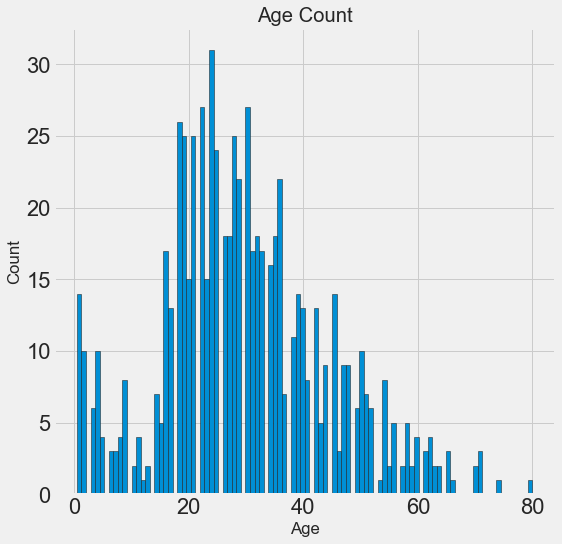

In [10]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['Age'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Age'); plt.ylabel('Count'); 
plt.title('Age Count');

In [11]:
data.loc[data['PassengerId'] == 777, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.75,Q


In [12]:
# Create a list of survivals.
types = data.dropna(subset=['Age'])
types = types['Survived'].value_counts()
types = list(types[types.values >= 0].index)

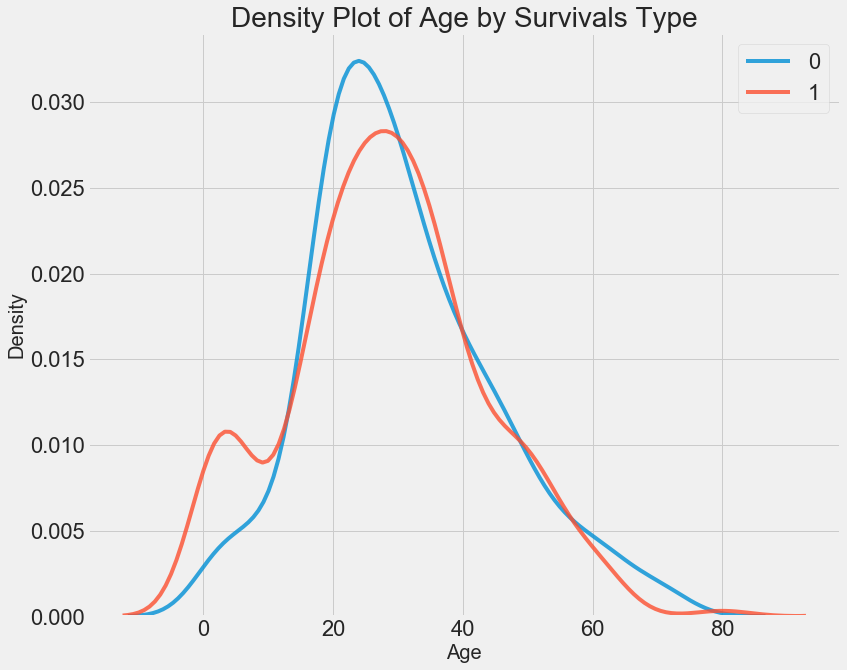

In [13]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each Survivals
for s_type in types:
    # Select the survival type
    subset = data[data['Survived'] == s_type]
    
    # Density plot of Age
    sns.kdeplot(subset['Age'].dropna(),
               label = s_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Age', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Age by Survivals Type', size = 28);